# Week 3 Lecture 1a: Logarithms and binary search

In [1]:
%run "boaz_utils.ipynb"

## Who am I?

__Jelani Nelson__

![](jelani.jpg)

[http://people.eecs.berkeley.edu/~minilek](http://people.eecs.berkeley.edu/~minilek)

minilek@berkeley.edu (or minilek@jamcoders.org.jm) 

## Searching

You have list of strings and want to find one inside it

<img src="search2.png" width="800">

Google database size is $\approx 10^{12}$ web pages. At very least need to perform following task:

Given list $L = [ s_1, s_2 , \ldots, s_N ]$ of strings and string $s$, find $i$ such that $s_i=s$.

__Question:__ Write function `find(L,s)` that takes as input a list `L` of strings and a string `s` and returns the first index `i` such that `L[i]==s` if there is such an index, or `-1` otherwise.

In [14]:
def find(L, s):
    for i in range(len(L)):
        if L[i] == s:
            return i
    return -1

In [3]:
def find(L,s):
    for i in range(len(L)):
        if L[i]==s: return i
    return -1

In [15]:
mu_players = ['Ander Herrera', 'Anthony Martial','Antonio Valencia','Ashley Young','Axel Tuanzebe','Chris Smalling','Daley Blind','David de Gea', 'Eric Bailly', 'Henrikh Mkhitaryan', 'Jesse Lingard', 'Joel Castro Pereira', 'Juan Mata', 'Luke Shaw', 'Marcos Rojo', 'Marcus Rashford', 'Marouane Fellaini', 'Matteo Darmian', 'Michael Carrick', 'Paul Pogba', 'Phil Jones', 'Romelu Lukaku', 'Sergio Romero', 'Timothy Fosu-Mensah', 'Victor Lindelof']

In [16]:
find(mu_players,"Jelani Nelson")

-1

## Efficiency

A computer is _fast_ but it is not _magical_

In [17]:
randomstring()

'enwvtuborr'

In [18]:
def listofstrings(n):
    return [randomstring() for i in range(n)]

In [19]:
listofstrings(4)

['hjccmluxcx', 'llbfbfcxtx', 'bgixyzfeos', 'qsbhlkviyg']

In [21]:
find(listofstrings(100000),randomstring())

-1

In [12]:
inputs = [[listofstrings(n),randomstring()] for n in range(1,10000,100)]

/home/minilek/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


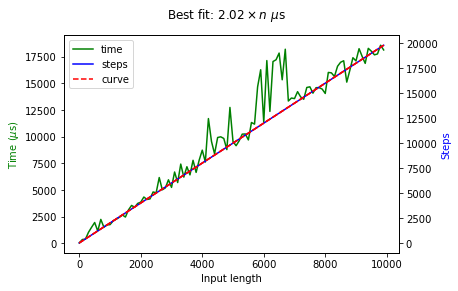

In [22]:
c,*_ = timer(find,inputs)

In [25]:
# Estimate for time for n= 100000 (in seconds)
c(100000)

0.20164151962541874

In [26]:
# estimate for n=10**12 
c(10**12)

2016415.1962541875

In [27]:
2016415./(60*60*24)

23.338136574074074

## Can we do better?

In [39]:
print(mu_players)

['Ander Herrera', 'Anthony Martial', 'Antonio Valencia', 'Ashley Young', 'Axel Tuanzebe', 'Chris Smalling', 'Daley Blind', 'David de Gea', 'Eric Bailly', 'Henrikh Mkhitaryan', 'Jesse Lingard', 'Joel Castro Pereira', 'Juan Mata', 'Luke Shaw', 'Marcos Rojo', 'Marcus Rashford', 'Marouane Fellaini', 'Matteo Darmian', 'Michael Carrick', 'Paul Pogba', 'Phil Jones', 'Romelu Lukaku', 'Sergio Romero', 'Timothy Fosu-Mensah', 'Victor Lindelof']


__Crucial observation:__ List is _sorted_.

__Question:__ Suppose you were in a school with 1000 students, and you see on the bulletin board the list of students _in alphabetical order_ and their grades. Do you need to look at all names to find your grade?

__Example:__ (on board) We can search through 8 sorted strings with only $3$ comparisons.

In [45]:
# if element is in L, it's somewhere between
# L[start] and L[stop-1]
def bin_search_helper(L, element, start, stop):
    # base case (L has length 1)
    if stop - start == 1:
        if L[start] == element:
            return start
        else:
            return -1
    if stop - start == 0:
        return -1
    # recursive case
    else:
        mid = (start+stop)//2
        if L[mid] == element:
            return mid
        if L[mid] < element:
            return bin_search_helper(L, element, mid+1, stop)
        else:
            return bin_search_helper(L, element, start, mid)
        

def binary_search(L, element):
    return bin_search_helper(L, element, 0, len(L))

# Done when $\frac n{2^k} \le 1$,
# which means we're done when $2^k \ge n$,
# which means we're done when $k \ge \log_2(n)$

__Exercise:__ Talk to your neighbors for 5 minutes, try to find a more efficient way to search for a string in a _sorted_ list.
Search through $100$ students using at most $7$ comparisons, through $1000$ students using at most $10$ comparisons, through $1000000$ students using at most $20$ comparisons.

In [ ]:
# You can use the fact that Python can compare strings:
"Boaz Barak" < "Jelani Nelson"

## Binary search

__Idea:__ If `L` is _sorted list_ of `n` elements and `s` is a string in the list, we can check if `s` is in the first half or second half of `L` by comparing `s` to `L[int(n/2)]`

__Exercise:__ Give a function `search8(L,s)` to find an element `s` in a length $8$  list `L` by comparing `s` to only $3$ members of `L`

In [16]:
def search8(L,s): # L is of length 8
    if s>=L[4]:
        if s>= L[6]:
            if s== L[6]: return 6
            if s== L[7]: return 7
        else:
            if s==L[4]: return 4
            if s==L[5]: return 5
    else:
        if s>= L[2]:
            if s==L[2]: return 2
            if s==L[3]: return 3
        else:
            if s==L[0]: return 0
            if s==L[1]: return 1
    return -1
           

In [17]:
search8(mu_players[:8],"Romelu Lukaku")

-1

In [22]:
search8(mu_players[:8],"Jelani Nelson")


-1

__Exercise:__ Give an algorithm to find an element $s$ in a length $16$  list $L$ by comparing $s$ to only $4$ members of $L$.
    
    
__Exercise:__ Give an algorithm to find an element $s$ in a length $32$  list $L$ by comparing $s$ to only $5$ members of $L$.
    
    

__Binary Search Algorithm:__ `binsearch`$(L,s)$

__Input:__ Sorted list $L=[L_0,\ldots,L_{n-1}]$, element $s$

__Goal:__ Output the index of $L$ containing $s$ or $-1$ otherwise.

1. If $L$ is empty return $-1$. If $n=1$ return $0$ if $s=L_0$ and $-1$ otherwise

2. Let $m = \lceil n/2 \rceil$.

3. If $s < L_m$, return `binsearch`$([L_0,\ldots,L_{m-1}],s)$ _(using recursion!)_

4. Otherwise compute $i=binsearch([L_m,\ldots,L_{n-1}],s)$ and return $m+i$ if $i \neq -1$, and $-1$ otherwise.

In [6]:
# be careful; this implementation isn't actually log_2(n) time!
# why not? because L[:mid] and L[mid:] create new lists, and actually take *linear time*!
def binsearch(L,s):
    if not L: return -1
    if len(L)==1:
        if L[0] == s:
            return 0
        else:
            return -1
    mid = int((len(L)+1)/2)  # could also use int(math.ceil(len(L)/2))
    if s<L[mid]: 
        return binsearch(L[:mid],s)
    if s>=L[mid]: 
        i = binsearch(L[mid:],s)
        if i >=0: return mid+i
        return -1

In [7]:
binsearch(mu_players,"Romelu Lukaku")

21

Is it faster?

In [8]:
random.seed(4943985)

In [9]:
s_inputs = [[sorted(listofstrings(n)),randomstring()] for n in range(1,10000,100)]

NameError: name 'listofstrings' is not defined

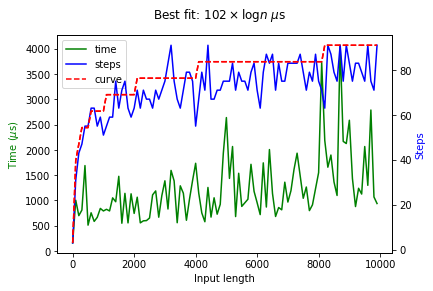

In [44]:
c,*_ = timer(binsearch,s_inputs)

In [45]:
c(10**12)

0.003972864602998028

Binary search does in $1/1000$ of a second what linear search does in $>100$ days!

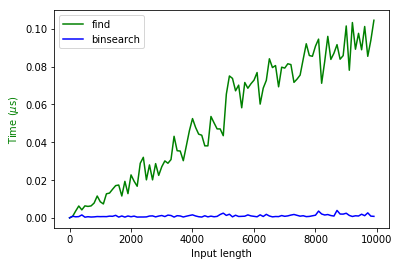

In [46]:
compare_times(find,binsearch,s_inputs)

__Intuition:__ One step of binary search reduces the size of the problem from $n$ to $n/2$

In $2$ steps we reduce the size to $n/4$.

In $3$ steps we reduce the size to $n/8$

In $4$ steps we reduce the size to $n/16$.

Running time is proportional to number $k$ such that $n < 2^k$. This is $k = \lceil \log_2 n \rceil$

In [47]:
# Some sense of propotion:

n = 100000000000000
math.log2(n)

46.50699332842307

A more clever algorithm can make a huge difference!

__Exercise:__ Find _non recursive_ implementation of binary search

In [33]:
def binsearchnr(L,s):
    start = 0
    end   = len(L)
    while start<end:
        mid = int((start+end)/2)
        if s<L[mid]: end = mid
        if s>L[mid]: start = mid+1
        if s==L[mid]: return mid
    return -1
    

In [34]:
binsearchnr(mu_players,"Boaz Barak")

-1

In [ ]:
c,*_ = timer(binsearchnr,s_inputs)

In [ ]:
c(10**12)

## Does it only work with strings?

In [48]:
numbers = sorted([ random.randint(1,1000) for i in range(100)])
numbers[:14]

[37, 58, 83, 94, 95, 112, 136, 146, 151, 159, 159, 161, 161, 163]

In [49]:
t= numbers[10]
print(t)

159


In [50]:
binsearch(numbers,t)

10

__Advanced comment:__  _Every_ objects you can compare, you can also _sort_ and use _binary search_.